In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

def plot_features_cat_classification(dataframe, target_col="", columns=[], mi_threshold=0.0, normalize=False):
    """
    Genera gráficos de distribución de etiquetas para características categóricas en un DataFrame
    respecto a una columna objetivo, basándose en la información mutua.

    Argumentos:
    dataframe (pd.DataFrame): DataFrame que contiene las características y la columna objetivo.
    target_col (str): Nombre de la columna objetivo en el DataFrame.
    columns (list): Lista de nombres de columnas a considerar. Si está vacía, se consideran todas las categóricas.
    mi_threshold (float): Umbral de información mutua para seleccionar características.
    normalize (bool): Si es True, normaliza los valores de información mutua.

    Retorna:
    None
    """
    
    # Verificación de valores de entrada
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("El primer argumento debe ser un DataFrame.")
    
    if target_col not in dataframe.columns:
        raise ValueError(f"La columna '{target_col}' no existe en el DataFrame.")
    
    if not isinstance(columns, list):
        raise ValueError("El argumento 'columns' debe ser una lista.")
    
    if not all(col in dataframe.columns for col in columns):
        raise ValueError("Al menos una de las columnas especificadas en 'columns' no existe en el DataFrame.")
    
    if not isinstance(mi_threshold, (float, int)):
        raise ValueError("El argumento 'mi_threshold' debe ser un número.")
    
    if not isinstance(normalize, bool):
        raise ValueError("El argumento 'normalize' debe ser un valor booleano.")
    
    if not columns:
        columns = dataframe.select_dtypes(include=['category', 'object']).columns.tolist()
    
    if len(columns) == 0:
        raise ValueError("No hay columnas categóricas para evaluar.")
    
    # Verificación de la columna objetivo
    if not pd.api.types.is_categorical_dtype(dataframe[target_col]) and not pd.api.types.is_object_dtype(dataframe[target_col]):
        raise ValueError(f"La columna '{target_col}' debe ser categórica.")
    
    # Calcular información mutua
    mi = mutual_info_classif(dataframe[columns], dataframe[target_col], discrete_features=True)
    
    if normalize:
        mi_sum = mi.sum()
        if mi_sum == 0:
            raise ValueError("La suma de información mutua es 0, no se puede normalizar.")
        mi = mi / mi_sum
    
    selected_features = [col for col, score in zip(columns, mi) if score >= mi_threshold]
    
    if not selected_features:
        print("No se encontraron características que cumplan con el umbral de información mutua.")
        return
    
    # Plotear la distribución de etiquetas para las características seleccionadas
    for feature in selected_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=dataframe, x=feature, hue=target_col)
        plt.title(f"Distribución de {target_col} por {feature}")
        plt.xlabel(feature)
        plt.ylabel("Cuenta")
        plt.legend(title=target_col)
        plt.show()

# Ejemplo de uso
# plot_features_cat_classification(dataframe=df_vinos, target_col="quality", columns=[], mi_threshold=0.05, normalize=False)


In [8]:
import pandas as pd

# Usar barras diagonales
df_vinos = pd.read_csv('C:/Users/ferna/DS_thebridge_online/team challenge grupos/Team-challenge-11/dataframe/wines_dataset.csv')

# Ver las primeras filas del dataframe
print(df_vinos.head())


  fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|pH|sulphates|alcohol|quality|class
0  8.5|0.21|0.26|9.25|0.034|73.0|142.0|0.9945|3.0...                                                                                                     
1  8.3|0.16|0.37|7.9|0.025|38.0|107.0|0.99306|2.9...                                                                                                     
2  6.8|0.18|0.38|1.4|0.038|35.0|111.0|0.9918|3.32...                                                                                                     
3  6.1|0.26|0.25|2.9|0.047|289.0|440.0|0.99314|3....                                                                                                     
4  7.5|0.63|0.27|2.0|0.083|17.0|91.0|0.99616|3.26...                                                                                                     


In [11]:
import pandas as pd

# Ruta al archivo CSV
file_path = r'C:\Users\ferna\DS_thebridge_online\team challenge grupos\Team-challenge-11\dataframe\wines_dataset.csv'

# Cargar el dataset con el delimitador adecuado
df_vinos = pd.read_csv(file_path, delimiter='|')

# Ver las primeras filas del dataframe
print(df_vinos.head())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            8.5              0.21         0.26            9.25      0.034   
1            8.3              0.16         0.37            7.90      0.025   
2            6.8              0.18         0.38            1.40      0.038   
3            6.1              0.26         0.25            2.90      0.047   
4            7.5              0.63         0.27            2.00      0.083   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 73.0                 142.0  0.99450  3.05       0.37   
1                 38.0                 107.0  0.99306  2.93       0.37   
2                 35.0                 111.0  0.99180  3.32       0.59   
3                289.0                 440.0  0.99314  3.44       0.64   
4                 17.0                  91.0  0.99616  3.26       0.58   

   alcohol  quality  class  
0     11.4        6  white  
1     11.9        6  white  

In [13]:
def plot_features_cat_classification(dataframe, target_col="", columns=[], mi_threshold=0.0, normalize=False):
    """
    Genera gráficos de distribución de etiquetas para características categóricas en un DataFrame
    respecto a una columna objetivo, basándose en la información mutua.

    Argumentos:
    dataframe (pd.DataFrame): DataFrame que contiene las características y la columna objetivo.
    target_col (str): Nombre de la columna objetivo en el DataFrame.
    columns (list): Lista de nombres de columnas a considerar. Si está vacía, se consideran todas las categóricas.
    mi_threshold (float): Umbral de información mutua para seleccionar características.
    normalize (bool): Si es True, normaliza los valores de información mutua.

    Retorna:
    None
    """
    
    # Verificación de valores de entrada
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("El primer argumento debe ser un DataFrame.")
    
    if target_col not in dataframe.columns:
        raise ValueError(f"La columna '{target_col}' no existe en el DataFrame.")
    
    if not isinstance(columns, list):
        raise ValueError("El argumento 'columns' debe ser una lista.")
    
    if not all(col in dataframe.columns for col in columns):
        raise ValueError("Al menos una de las columnas especificadas en 'columns' no existe en el DataFrame.")
    
    if not isinstance(mi_threshold, (float, int)):
        raise ValueError("El argumento 'mi_threshold' debe ser un número.")
    
    if not isinstance(normalize, bool):
        raise ValueError("El argumento 'normalize' debe ser un valor booleano.")
    
    if not columns:
        columns = dataframe.select_dtypes(include=['category', 'object']).columns.tolist()
    
    if len(columns) == 0:
        raise ValueError("No hay columnas categóricas para evaluar.")
    
    # Verificación de la columna objetivo
    if not pd.api.types.is_categorical_dtype(dataframe[target_col]) and not pd.api.types.is_object_dtype(dataframe[target_col]):
        raise ValueError(f"La columna '{target_col}' debe ser categórica.")
    
    # Calcular información mutua
    mi = mutual_info_classif(dataframe[columns], dataframe[target_col], discrete_features=True)
    
    if normalize:
        mi_sum = mi.sum()
        if mi_sum == 0:
            raise ValueError("La suma de información mutua es 0, no se puede normalizar.")
        mi = mi / mi_sum
    
    selected_features = [col for col, score in zip(columns, mi) if score >= mi_threshold]
    
    if not selected_features:
        print("No se encontraron características que cumplan con el umbral de información mutua.")
        return
    
    # Plotear la distribución de etiquetas para las características seleccionadas
    for feature in selected_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=dataframe, x=feature, hue=target_col)
        plt.title(f"Distribución de {target_col} por {feature}")
        plt.xlabel(feature)
        plt.ylabel("Cuenta")
        plt.legend(title=target_col)
        plt.show()

# Ejemplo de uso con el dataset de vinos
plot_features_cat_classification(dataframe=df_vinos, target_col="class", columns=[], mi_threshold=0.05, normalize=False)


C:\Users\ferna\AppData\Local\Temp\ipykernel_15980\858466729.py:43: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(dataframe[target_col]) and not pd.api.types.is_object_dtype(dataframe[target_col]):


ValueError: could not convert string to float: 'white'

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder



C:\Users\ferna\AppData\Local\Temp\ipykernel_15980\3780239819.py:43: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(dataframe[target_col]) and not pd.api.types.is_object_dtype(dataframe[target_col]):
C:\Users\ferna\AppData\Local\Temp\ipykernel_15980\3780239819.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_col)


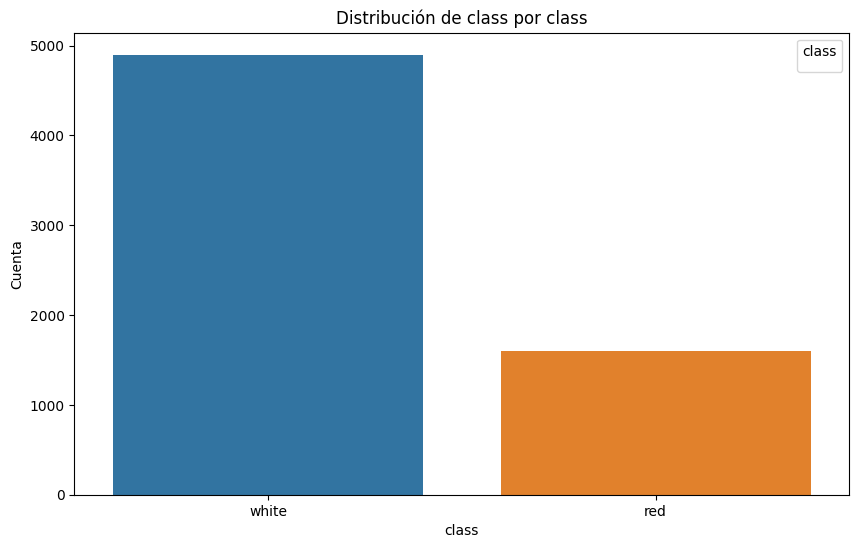

In [15]:
def plot_features_cat_classification(dataframe, target_col="", columns=[], mi_threshold=0.0, normalize=False):
    """
    Genera gráficos de distribución de etiquetas para características categóricas en un DataFrame
    respecto a una columna objetivo, basándose en la información mutua.

    Argumentos:
    dataframe (pd.DataFrame): DataFrame que contiene las características y la columna objetivo.
    target_col (str): Nombre de la columna objetivo en el DataFrame.
    columns (list): Lista de nombres de columnas a considerar. Si está vacía, se consideran todas las categóricas.
    mi_threshold (float): Umbral de información mutua para seleccionar características.
    normalize (bool): Si es True, normaliza los valores de información mutua.

    Retorna:
    None
    """
    
    # Verificación de valores de entrada
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("El primer argumento debe ser un DataFrame.")
    
    if target_col not in dataframe.columns:
        raise ValueError(f"La columna '{target_col}' no existe en el DataFrame.")
    
    if not isinstance(columns, list):
        raise ValueError("El argumento 'columns' debe ser una lista.")
    
    if not all(col in dataframe.columns for col in columns):
        raise ValueError("Al menos una de las columnas especificadas en 'columns' no existe en el DataFrame.")
    
    if not isinstance(mi_threshold, (float, int)):
        raise ValueError("El argumento 'mi_threshold' debe ser un número.")
    
    if not isinstance(normalize, bool):
        raise ValueError("El argumento 'normalize' debe ser un valor booleano.")
    
    if not columns:
        columns = dataframe.select_dtypes(include=['category', 'object']).columns.tolist()
    
    if len(columns) == 0:
        raise ValueError("No hay columnas categóricas para evaluar.")
    
    # Verificación de la columna objetivo
    if not pd.api.types.is_categorical_dtype(dataframe[target_col]) and not pd.api.types.is_object_dtype(dataframe[target_col]):
        raise ValueError(f"La columna '{target_col}' debe ser categórica.")
    
    # Convertir características categóricas a numéricas
    le = LabelEncoder()
    df_encoded = dataframe.copy()
    for col in columns:
        df_encoded[col] = le.fit_transform(df_encoded[col])
    
    # Calcular información mutua
    mi = mutual_info_classif(df_encoded[columns], le.fit_transform(df_encoded[target_col]), discrete_features=True)
    
    if normalize:
        mi_sum = mi.sum()
        if mi_sum == 0:
            raise ValueError("La suma de información mutua es 0, no se puede normalizar.")
        mi = mi / mi_sum
    
    selected_features = [col for col, score in zip(columns, mi) if score >= mi_threshold]
    
    if not selected_features:
        print("No se encontraron características que cumplan con el umbral de información mutua.")
        return
    
    # Plotear la distribución de etiquetas para las características seleccionadas
    for feature in selected_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=dataframe, x=feature, hue=target_col)
        plt.title(f"Distribución de {target_col} por {feature}")
        plt.xlabel(feature)
        plt.ylabel("Cuenta")
        plt.legend(title=target_col)
        plt.show()

# Ejemplo de uso con el dataset de vinos
plot_features_cat_classification(dataframe=df_vinos, target_col="class", columns=[], mi_threshold=0.05, normalize=False)


In [22]:
import numpy as np
import pandas as pd 
from scipy.stats import f_oneway

In [23]:
df1 = pd.read_csv('./data/datasets/lifesat_full.csv', sep=',')
df2 = pd.read_csv('./data/datasets/pima_indians.csv', sep=',') #Target 'class'
df3 = pd.read_csv('./data/datasets/temps.csv', sep=',')
df4 = pd.read_csv('./data/datasets/titanic.csv', sep=',') #Target 'alive'
df5 = pd.read_csv('./data/datasets/CarPrice_Assignment.csv', sep=',') # target 'Price... o eso creo.  
df6 = pd.read_csv('./data/datasets/bank-full.csv', sep=';') #El target parce que es 'y'  
df7 = pd.read_csv('./data/datasets/dataset_viajes_jun23.csv', sep=',') #El target, 'aircompany' por ejemplo.

FileNotFoundError: [Errno 2] No such file or directory: './data/datasets/lifesat_full.csv'